# Classification (Logistic Regression, LDA, QDA)


–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –Ω–∞ —ç—Ç–æ–º —Å–µ–º–∏–Ω–∞—Ä–µ –≤—ã –ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç–µ—Å—å —Å –∑–∞–¥–∞—á–µ–π –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –õ–∏–Ω–µ–π–Ω—ã–º –∏ –ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—ã–º –î–∏—Å–∫—Ä–∏–º–∏–Ω–∞–Ω—Ç–Ω—ã–º –ê–Ω–∞–ª–∏–∑–æ–º (LDA & QDA), –õ–æ–≥–∏—á–µ—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π, –∞ —Ç–∞–∫ –∂–µ –ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç–µ—Å—å —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –º–µ—Ç—Ä–∏–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[–£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ ROC-curve –∏ ROC AUC](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)\
[–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–≥–æ ROC-curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)\
[–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ PR-curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

## –ó–∞–¥–∞—á–∞ 1


### –í–≤–µ–¥–µ–Ω–∏–µ –≤ LDA

–î–ª—è –Ω–∞—á–∞–ª–∞ –Ω–∞—É—á–∏–º—Å—è –ø—Ä–∏–º–µ–Ω—è—Ç—å [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html), –ø–æ–¥–∫–ª—é—á–∏–º –µ–≥–æ

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from math import log
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score, average_precision_score



–°–≥–µ–Ω–µ—Ä–∏—Ä—É–π—Ç–µ –≤—ã–±–æ—Ä–∫–∏ $X_{0}\sim\mathcal{N}(\mu_{0},\Sigma_{0})$ –æ–±—ä–µ–º–∞ $n_{0}=100$, –≥–¥–µ $\Sigma_{0}=\begin{pmatrix}2 & 0\\ 0 & 0.5\end{pmatrix}, \mu_{0}=(0,0)$ –∏ $X_{1}\sim\mathcal{N}(\mu_{1},\Sigma_{1})$ –æ–±—ä–µ–º–∞ $n_{1}=100$, –≥–¥–µ $\Sigma_{1}=\begin{pmatrix}0.5 & 0\\ 0 & 2\end{pmatrix}, \mu_{0}=(1,1)$, –∏ –∏–∑–æ–±—Ä–∞–∑–∏—Ç–µ –∏—Ö –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –≤–∏–∑—É–∞–ª—å–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å —ç—Ç–∏ –¥–≤–∞ –∫–ª–∞—Å—Å–∞

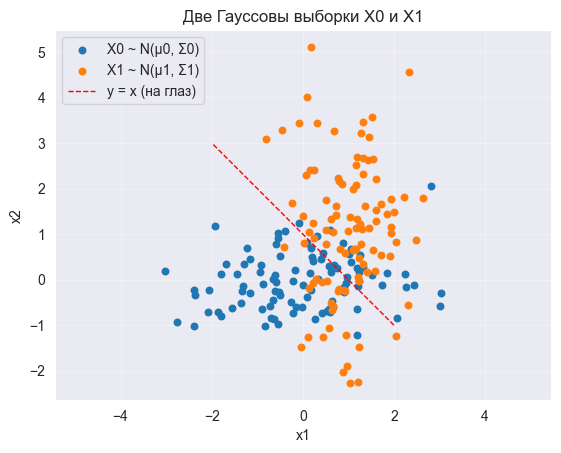

In [7]:
rng = np.random.default_rng(42)

n0, n1 = 100, 100
mu0 = np.array([0.0, 0.0])
Sigma0 = np.array([[2.0, 0.0],
                   [0.0, 0.5]])

mu1 = np.array([1.0, 1.0])
Sigma1 = np.array([[0.5, 0.0],
                   [0.0, 2.0]])

X0 = rng.multivariate_normal(mu0, Sigma0, size=n0)
X1 = rng.multivariate_normal(mu1, Sigma1, size=n1)

fig = plt.figure()
plt.scatter(X0[:, 0], X0[:, 1], s=22, label="X0 ~ N(Œº0, Œ£0)")
plt.scatter(X1[:, 0], X1[:, 1], s=22, label="X1 ~ N(Œº1, Œ£1)")

plt.plot([2, -2], [-1, 3], "--", lw=1, label="y = x (–Ω–∞ –≥–ª–∞–∑)", color="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("–î–≤–µ –ì–∞—É—Å—Å–æ–≤—ã –≤—ã–±–æ—Ä–∫–∏ X0 –∏ X1")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


–û–±—ä–µ–¥–∏–Ω–∏—Ç–µ –≤—ã–±–æ—Ä–∫–∏ –≤ –µ–¥–∏–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ –∏—Ö –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞, –¥–æ–±–∞–≤–∏–≤ —Å—Ç–æ–ª–±–µ—Ü label. –ü—Ä–∏–º–µ–Ω–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä LDA –∫ —ç—Ç–∏–º –≤—ã–±–æ—Ä–∫–∞–º –∏ –æ—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

         x1        x2  label
0  0.430935 -0.735380      0
1  1.061298  0.665080      0
2 -2.759180 -0.920780      0
3  0.180794 -0.223617      0
4 -0.023760 -0.603193      0
Test accuracy: 0.7
Confusion matrix (rows=true, cols=pred):
 [[21  9]
 [ 9 21]]
Classification report:
               precision    recall  f1-score   support

           0      0.700     0.700     0.700        30
           1      0.700     0.700     0.700        30

    accuracy                          0.700        60
   macro avg      0.700     0.700     0.700        60
weighted avg      0.700     0.700     0.700        60

5-fold CV accuracy: 0.740 ¬± 0.041


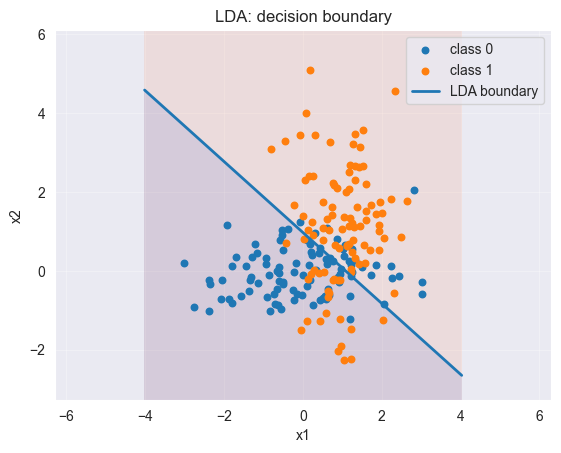

In [16]:

#clf = LinearDiscriminantAnalysis()
X = np.vstack([X0, X1])
y = np.concatenate([np.zeros(len(X0), dtype=int), np.ones(len(X1), dtype=int)])
df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'label': y})
print(df.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=52)

clf = LinearDiscriminantAnalysis() 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred, digits=3))


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_acc = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print(f"5-fold CV accuracy: {cv_acc.mean():.3f} ¬± {cv_acc.std():.3f}")

fig = plt.figure()

x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 400),
                       np.linspace(x2_min, x2_max, 400))
grid = np.c_[xx1.ravel(), xx2.ravel()]
zz = clf.predict(grid).reshape(xx1.shape)
plt.contourf(xx1, xx2, zz, alpha=0.15, levels=[-0.5,0.5,1.5])

plt.scatter(X[y==0,0], X[y==0,1], s=22, label='class 0')
plt.scatter(X[y==1,0], X[y==1,1], s=22, label='class 1')

w = clf.coef_[0]; b = clf.intercept_[0]
if abs(w[1]) > 1e-12:
    xs = np.linspace(x1_min, x1_max, 400)
    ys = -(w[0]*xs + b)/w[1]
    plt.plot(xs, ys, '-', lw=2, label='LDA boundary')

plt.xlabel('x1'); plt.ylabel('x2'); plt.title('LDA: decision boundary')
plt.legend(); plt.axis('equal'); plt.grid(alpha=0.3)
plt.show()

–¢–∞–∫ –∂–µ, –∫–∞–∫ –∏ –ª—é–±–∞—è –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å, LDA —Å—Ç—Ä–æ–∏—Ç —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –ª–∏–Ω–µ–π–Ω—É—é –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å –≤–∏–¥–∞ $\overline{\omega}\overline{X}+b=0$ (–¥–ª—è 2—Ö –∫–ª–∞—Å—Å–æ–≤). –î–∞–Ω–Ω–∞—è –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º—É –ø–æ—Ä–æ–≥—É $t=\frac{1}{2}$. –ü–æ–¥—É–º–∞–π—Ç–µ, –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å –ø—Ä–∏ –≤—ã–±–æ—Ä–µ –¥—Ä—É–≥–æ–≥–æ –ø–æ—Ä–æ–≥–∞.


–ò–∑–æ–±—Ä–∞–∑–∏—Ç–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—É—é LDA –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å –≤—Ä—É—á–Ω—É—é —Å –ø–æ–º–æ—â—å—é –ø–æ–ª–µ–π *.coef_* –∏ *.intercept_* –∫–ª–∞—Å—Å–∞ LinearDiscriminantAnalysis, –∞ —Ç–∞–∫ –∂–µ —Å –ø–æ–º–æ—â—å—é –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) –∏–ª–∏ [plot_decision_region](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

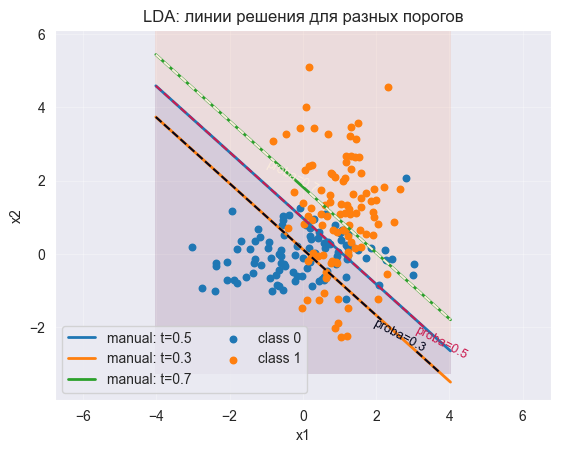

In [24]:
w = clf.coef_[0]
b = clf.intercept_[0]

x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 800),
                       np.linspace(x2_min, x2_max, 800))
grid = np.c_[xx1.ravel(), xx2.ravel()]

fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict", 
    plot_method="contourf", levels=[-0.5, 0.5, 1.5], alpha=0.15, ax=ax
)


# –†—É—á–Ω—ã–µ –ø—Ä—è–º—ã–µ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤
def plot_line_for_t(ax, t, label):
    bt = b - log(t/(1-t))  # —Å–¥–≤–∏–≥ intercept –ø–æ–¥ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥
    if abs(w[1]) > 1e-12:
        xs = np.linspace(x1_min, x1_max, 400)
        ys = -(w[0]*xs + bt)/w[1]
        ax.plot(xs, ys, lw=2, label=label)
    else:
        x_vert = -bt / w[0]
        ax.axvline(x_vert, lw=2, label=label)

for t, lab in [(0.5, "manual: t=0.5"), (0.3, "manual: t=0.3"), (0.7, "manual: t=0.7")]:
    plot_line_for_t(ax, t, lab)
    
    
proba = clf.predict_proba(grid)[:, 1].reshape(xx1.shape)
cs = ax.contour(xx1, xx2, proba, levels=[0.3, 0.5, 0.7],
                linestyles=["--", "--", "--"], linewidths=1.5)
ax.clabel(cs, fmt=lambda v: f"proba={v:.1f}", inline=True, fontsize=9)

# 6) –¢–æ—á–∫–∏
ax.scatter(X[y==0,0], X[y==0,1], s=22, label='class 0')
ax.scatter(X[y==1,0], X[y==1,1], s=22, label='class 1')

ax.set_xlabel('x1'); ax.set_ylabel('x2')
ax.set_title('LDA: –ª–∏–Ω–∏–∏ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤')
ax.legend(ncol=2); ax.axis('equal'); ax.grid(alpha=0.3)
plt.show()



–ò—Å–ø–æ–ª—å–∑—É—è –æ–±—É—á–µ–Ω–Ω—ã–µ –≤–µ—Å–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞, –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑–¥–µ–ª—è—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö –ø–æ—Ä–æ–≥–∞ t

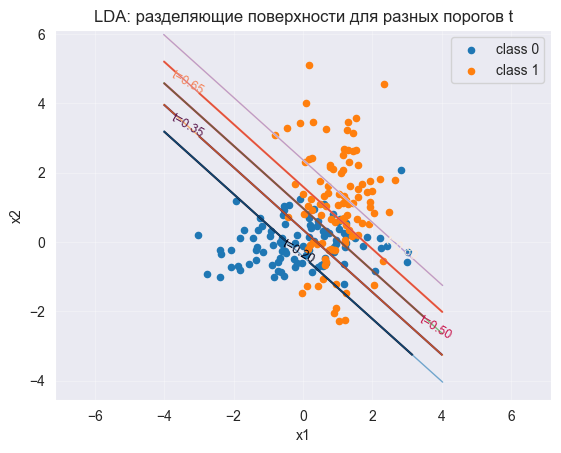

In [26]:
Ts = [0.2, 0.35, 0.5, 0.65, 0.8]
x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 800),
                       np.linspace(x2_min, x2_max, 800))
grid = np.c_[xx1.ravel(), xx2.ravel()]
proba = clf.predict_proba(grid)[:, 1].reshape(xx1.shape)

fig, ax = plt.subplots()

# –ò–∑–æ–ª–∏–Ω–∏–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ P(y=1|x)=t
cs = ax.contour(xx1, xx2, proba, levels=Ts, linewidths=1.5)
ax.clabel(cs, fmt=lambda v: f"t={v:.2f}", inline=True, fontsize=9)

# –≥—Ä–∞–Ω–∏—Ü—ã "–≤—Ä—É—á–Ω—É—é" (–ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω—ã–µ –ø—Ä—è–º—ã–µ): w^T x + b_t = 0
if abs(w[1]) > 1e-12:
    xs = np.linspace(x1_min, x1_max, 400)
    for t in Ts:
        bt = b - log(t/(1-t))
        ys = -(w[0]*xs + bt)/w[1]
        ax.plot(xs, ys, lw=1, alpha=0.6)
else:
    for t in Ts:
        bt = b - log(t/(1-t))
        x_vert = -bt / w[0]
        ax.axvline(x_vert, lw=1, alpha=0.6)

# –¢–æ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö
ax.scatter(X[y==0,0], X[y==0,1], s=20, label='class 0')
ax.scatter(X[y==1,0], X[y==1,1], s=20, label='class 1')

ax.set_xlabel('x1'); ax.set_ylabel('x2')
ax.set_title('LDA: —Ä–∞–∑–¥–µ–ª—è—é—â–∏–µ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤ t')
ax.legend(); ax.axis('equal'); ax.grid(alpha=0.3)
plt.show()

–ù–∞ —Å–∫–æ–ª—å–∫–æ –≤–∞—à–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ –≤–∏–¥–µ –ø—Ä—è–º–æ–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ—Ç–≤–µ—Ç—É LDA?

+- —è –ø–æ–ø–∞–ª)

### –ú–µ—Ç—Ä–∏–∫–∏

–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –≤—Ä—É—á–Ω—É—é –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) (–¥–ª—è –ø–æ—Ä–æ–≥–∞ $t=\dfrac{1}{2}$), –∞ –∑–∞—Ç–µ–º —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å–æ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º–∏ —Ñ—É–Ω–∫—Ü–∏—è–º–∏ sklearn

In [30]:
proba = clf.predict_proba(X_test)[:, 1]
y_pred05 = (proba >= 0.5).astype(int)
assert np.array_equal(y_pred, y_pred05), "y_pred –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –ø–æ—Ä–æ–≥—É 0.5"

# –ü–æ–¥—Å—á—ë—Ç TP/TN/FP/FN –≤—Ä—É—á–Ω—É—é
tp = int(np.sum((y_test == 1) & (y_pred == 1)))
tn = int(np.sum((y_test == 0) & (y_pred == 0)))
fp = int(np.sum((y_test == 0) & (y_pred == 1)))
fn = int(np.sum((y_test == 1) & (y_pred == 0)))
n  = int(y_test.size)

acc = (tp + tn) / n
prec = tp / (tp + fp) if (tp + fp) > 0 else float('nan')
rec  = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
f1   = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else float('nan')

print(f"Manual counts: TP={tp}, FP={fp}, TN={tn}, FN={fn}, N={n}")
print(f"Manual metrics (t=0.5): Accuracy={acc:.3f}  Precision={prec:.3f}  Recall={rec:.3f}  F1={f1:.3f}")

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å–æ sklearn (binary, pos_label=1)
print("sklearn:",
      f"Acc={accuracy_score(y_test, y_pred):.3f}",
      f"P={precision_score(y_test, y_pred, zero_division=0):.3f}",
      f"R={recall_score(y_test, y_pred, zero_division=0):.3f}",
      f"F1={f1_score(y_test, y_pred, zero_division=0):.3f}")

Manual counts: TP=21, FP=9, TN=21, FN=9, N=60
Manual metrics (t=0.5): Accuracy=0.700  Precision=0.700  Recall=0.700  F1=0.700
sklearn: Acc=0.700 P=0.700 R=0.700 F1=0.700


–ü–æ—Å—Ç—Ä–æ–π—Ç–µ [ROC-curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) –∏ [PR-curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ [–ø–ª–æ—â–∞–¥–∏](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) –ø–æ–¥ —ç—Ç–∏ –∫—Ä–∏–≤—ã–º–∏


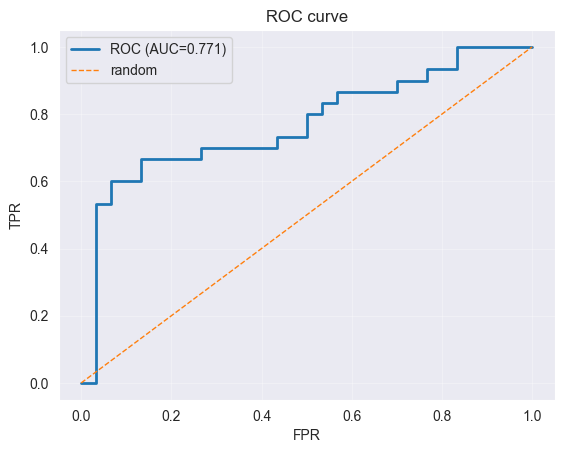

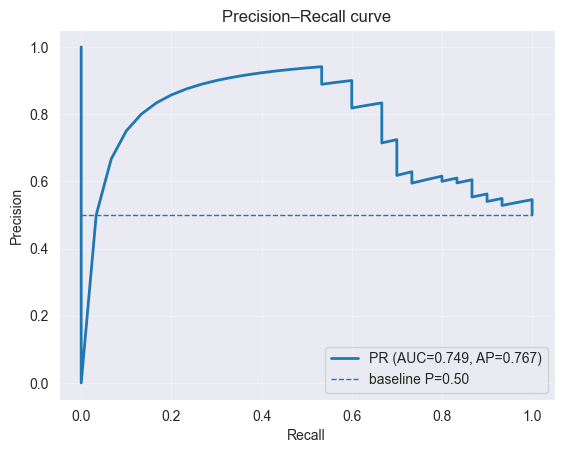

ROC AUC (auc) = 0.771111;  ROC AUC (roc_auc_score) = 0.771111
PR AUC (auc)   = 0.748818;  Average Precision (AP)   = 0.766546


In [33]:
y_score = clf.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, roc_th = roc_curve(y_test, y_score)  
roc_auc = auc(fpr, tpr)                        # ROC
roc_auc_chk = roc_auc_score(y_test, y_score)

# PR
prec, rec, pr_th = precision_recall_curve(y_test, y_score)
pr_auc = auc(rec, prec)                        # –ø–ª–æ—â–∞–¥—å –ø–æ–¥ PR-–∫—Ä–∏–≤–æ–π (trapz)
ap = average_precision_score(y_test, y_score)  # Average Precision

prevalence = y_test.mean()                     # baseline for PR

fig = plt.figure()
plt.plot(fpr, tpr, lw=2, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], "--", lw=1, label="random")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC curve"); plt.legend(); plt.grid(alpha=0.3)
plt.show()

fig = plt.figure()
plt.plot(rec, prec, lw=2, label=f"PR (AUC={pr_auc:.3f}, AP={ap:.3f})")
plt.hlines(prevalence, 0, 1, linestyles="--", lw=1, label=f"baseline P={prevalence:.2f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision‚ÄìRecall curve"); plt.legend(); plt.grid(alpha=0.3)
plt.show()

print(f"ROC AUC (auc) = {roc_auc:.6f};  ROC AUC (roc_auc_score) = {roc_auc_chk:.6f}")
print(f"PR AUC (auc)   = {pr_auc:.6f};  Average Precision (AP)   = {ap:.6f}")

–ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –æ –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏ LDA?

Your answer here

## –ó–∞–¥–∞—á–∞ 2

–¢–µ–ø–µ—Ä—å –Ω–∞—É—á–∏–º—Å—è –ø—Ä–∏–º–µ–Ω—è—Ç—å [QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

–ü—Ä–∏–º–µ–Ω–∏—Ç–µ QDA –∫ –¥–∞–Ω–Ω—ã–º –∏–∑ –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–∏, –æ—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏, —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å LDA

QDA test accuracy: 0.733
QDA confusion (rows=true, cols=pred):
 [[21  9]
 [ 7 23]]
QDA classification report:
               precision    recall  f1-score   support

           0      0.750     0.700     0.724        30
           1      0.719     0.767     0.742        30

    accuracy                          0.733        60
   macro avg      0.734     0.733     0.733        60
weighted avg      0.734     0.733     0.733        60

QDA 5-fold CV accuracy: 0.825 ¬± 0.067

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ LDA vs QDA (accuracy):
model  test_acc  cv_acc_mean  cv_acc_std
  LDA  0.700000        0.740    0.040620
  QDA  0.733333        0.825    0.067082


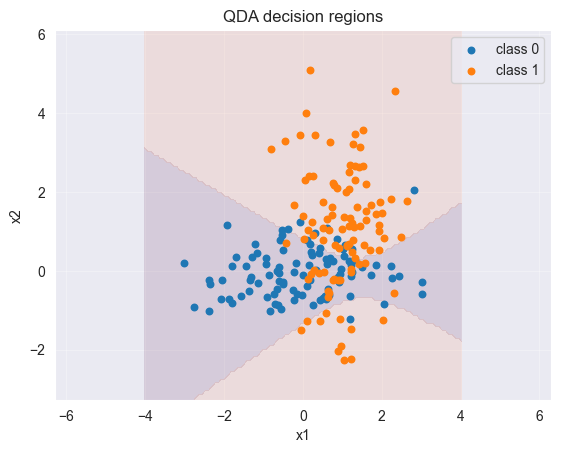

In [35]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)
acc_qda = accuracy_score(y_test, y_pred_qda)
print(f"QDA test accuracy: {acc_qda:.3f}")
print("QDA confusion (rows=true, cols=pred):\n", confusion_matrix(y_test, y_pred_qda))
print("QDA classification report:\n", classification_report(y_test, y_pred_qda, digits=3)) 

# QDA cross-val (—Ç–∞ –∂–µ —Å—Ö–µ–º–∞, —á—Ç–æ –∏ –¥–ª—è LDA)
cv_acc_qda = cross_val_score(qda, X, y, cv=cv, scoring='accuracy')
print(f"QDA 5-fold CV accuracy: {cv_acc_qda.mean():.3f} ¬± {cv_acc_qda.std():.3f}")

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å LDA –Ω–∞ —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö
acc_lda = accuracy_score(y_test, y_pred) 
cv_acc_lda = cross_val_score(clf, X, y, cv=cv, scoring='accuracy') 

cmp = pd.DataFrame({
    "model": ["LDA", "QDA"],
    "test_acc": [acc_lda, acc_qda],
    "cv_acc_mean": [cv_acc_lda.mean(), cv_acc_qda.mean()],
    "cv_acc_std":  [cv_acc_lda.std(),  cv_acc_qda.std()]
})
print("\n–°—Ä–∞–≤–Ω–µ–Ω–∏–µ LDA vs QDA (accuracy):")
print(cmp.to_string(index=False))

# –î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏: —Ñ–æ–Ω QDA (–∫–æ–Ω—Ç—É—Ä—ã –∫–ª–∞—Å—Å–æ–≤) + —Ç–æ—á–∫–∏
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    qda, X, response_method="predict",
    plot_method="contourf", levels=[-0.5, 0.5, 1.5], alpha=0.15, ax=ax
)
ax.scatter(X[y==0,0], X[y==0,1], s=22, label='class 0')
ax.scatter(X[y==1,0], X[y==1,1], s=22, label='class 1')
ax.set_title("QDA decision regions")
ax.set_xlabel("x1"); ax.set_ylabel("x2")
ax.legend(); ax.axis("equal"); ax.grid(alpha=0.3)
plt.show()

–°–¥–µ–ª–∞–π—Ç–µ –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –≤ –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–µ $n_{0}=25,n_{1}=250$

In [ ]:
#Your code here

–ü—Ä–∏–º–µ–Ω–∏—Ç–µ LDA –∏ QDA. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Ä–∞–∑–¥–µ–ª—è—é—â–∏–µ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏.
–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –¥–≤–µ –º–æ–¥–µ–ª–∏


LDA:
Accuracy=0.940  Precision=0.949  Recall=0.987  F1=0.967
Confusion (rows=true, cols=pred):
 [[ 4  4]
 [ 1 74]]

QDA:
Accuracy=0.928  Precision=0.937  Recall=0.987  F1=0.961
Confusion (rows=true, cols=pred):
 [[ 3  5]
 [ 1 74]]

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π (test metrics):
model  Accuracy  Precision   Recall       F1
  LDA  0.939759   0.948718 0.986667 0.967320
  QDA  0.927711   0.936709 0.986667 0.961039


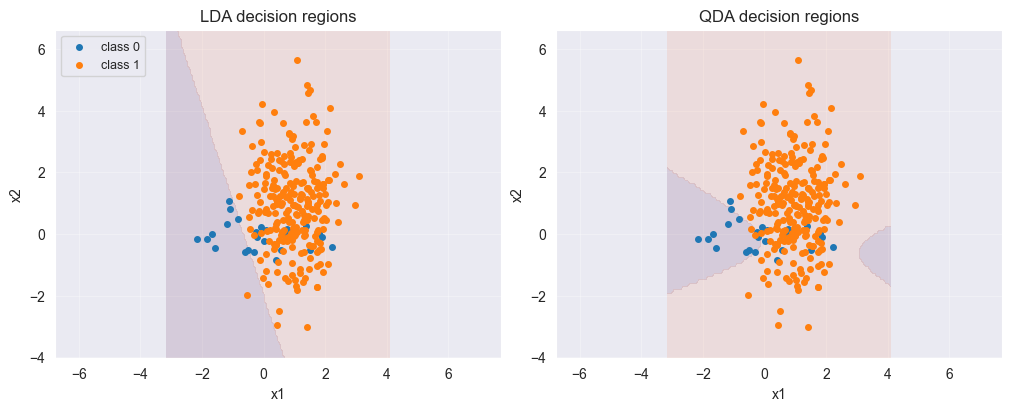

In [37]:
rng = np.random.default_rng(1488)
n0, n1 = 25, 250
mu0 = np.array([0.0, 0.0]); Sigma0 = np.array([[2.0, 0.0],[0.0, 0.5]])
mu1 = np.array([1.0, 1.0]); Sigma1 = np.array([[0.5, 0.0],[0.0, 2.0]])

X0 = rng.multivariate_normal(mu0, Sigma0, size=n0)
X1 = rng.multivariate_normal(mu1, Sigma1, size=n1)

X = np.vstack([X0, X1])
y = np.concatenate([np.zeros(len(X0), dtype=int), np.ones(len(X1), dtype=int)])

# Train/test —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=52
)

# –ú–æ–¥–µ–ª–∏
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

def eval_model(model, name):
    y_pred = model.predict(X_test)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    cm   = confusion_matrix(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy={acc:.3f}  Precision={prec:.3f}  Recall={rec:.3f}  F1={f1:.3f}")
    print("Confusion (rows=true, cols=pred):\n", cm)
    return {"model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

# –û—Ü–µ–Ω–∫–∞
rows = []
rows.append(eval_model(lda, "LDA"))
rows.append(eval_model(qda, "QDA"))

print("\n–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π (test metrics):")
print(pd.DataFrame(rows).to_string(index=False))

# –†–∞–∑–¥–µ–ª—è—é—â–∏–µ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
titles = ["LDA decision regions", "QDA decision regions"]
models = [lda, qda]

x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1

for ax, mdl, ttl in zip(axes, models, titles):
    DecisionBoundaryDisplay.from_estimator(
        mdl, X, response_method="predict",
        plot_method="contourf", levels=[-0.5, 0.5, 1.5], alpha=0.15, ax=ax
    )
    ax.scatter(X[y==0,0], X[y==0,1], s=16, label='class 0')
    ax.scatter(X[y==1,0], X[y==1,1], s=16, label='class 1')
    ax.set_title(ttl); ax.set_xlabel("x1"); ax.set_ylabel("x2")
    ax.axis("equal"); ax.grid(alpha=0.3)

axes[0].legend(loc="upper left", fontsize=9)
plt.show()

–ö–∞–∫–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏?

Your answer here

In [ ]:
#Your code here

–°—Ä–∞–≤–Ω–∏—Ç–µ –≤–∏–∑—É–∞–ª—å–Ω–æ ROC-curve –∏ PR-curve —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤. –ù–∞ PR-curve –æ—Ç–º–µ—Ç—å—Ç–µ —Ç–æ—á–∫—É —Å –Ω–∞–∏–ª—É—á—à–µ–π F1 –º–µ—Ä–æ–π.

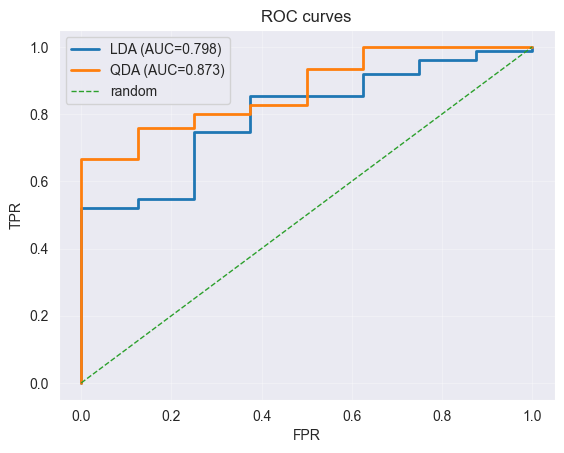

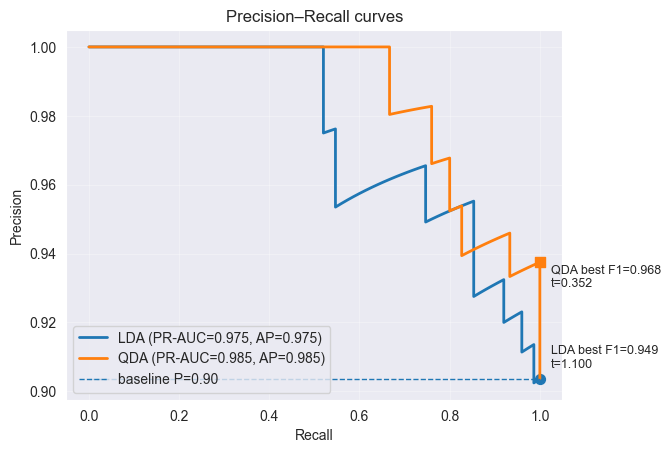

LDA:  ROC-AUC=0.7983  PR-AUC=0.9749  AP=0.9751  bestF1=0.9494 at t=1.100
QDA:  ROC-AUC=0.8733  PR-AUC=0.9853  AP=0.9854  bestF1=0.9677 at t=0.352


In [38]:
y_score_lda = clf.predict_proba(X_test)[:, 1] 
y_score_qda = qda.predict_proba(X_test)[:, 1]

def curves_and_best_f1(y_true, y_score):
    # ROC
    fpr, tpr, thr_roc = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    # PR
    prec, rec, thr_pr = precision_recall_curve(y_true, y_score)
    pr_auc = auc(rec, prec)
    ap = average_precision_score(y_true, y_score)

    # –õ—É—á—à–∞—è F1 –Ω–∞ PR (–ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –∫—Ä–∏–≤–æ–π)
    f1s = 2 * prec * rec / (prec + rec + 1e-12)
    i_best = int(np.nanargmax(f1s))
    # —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –ø–æ—Ä–æ–≥: –¥–ª—è —Ç–æ—á–∫–∏ i>0 –±–µ—Ä—ë–º thr_pr[i-1], –¥–ª—è i=0 –ø–æ—Ä–æ–≥ —Ñ–æ—Ä–º–∞–ª—å–Ω–æ > max(score)
    t_best = (thr_pr[i_best-1] if i_best > 0 else 1.1)


    return {
        "roc": (fpr, tpr, roc_auc),
        "pr": (rec, prec, pr_auc, ap),
        "best": {"idx": i_best, "rec": rec[i_best], "prec": prec[i_best], "f1": f1s[i_best], "thr": t_best}
    }

lda_stats = curves_and_best_f1(y_test, y_score_lda)
qda_stats = curves_and_best_f1(y_test, y_score_qda)

# ROC: both models
fig = plt.figure()
plt.plot(lda_stats["roc"][0], lda_stats["roc"][1], lw=2, label=f"LDA (AUC={lda_stats['roc'][2]:.3f})")
plt.plot(qda_stats["roc"][0], qda_stats["roc"][1], lw=2, label=f"QDA (AUC={qda_stats['roc'][2]:.3f})")
plt.plot([0,1], [0,1], "--", lw=1, label="random")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC curves"); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# PR: both models + top-F1
fig = plt.figure()
plt.plot(lda_stats["pr"][0], lda_stats["pr"][1], lw=2,
         label=f"LDA (PR-AUC={lda_stats['pr'][2]:.3f}, AP={lda_stats['pr'][3]:.3f})")
plt.plot(qda_stats["pr"][0], qda_stats["pr"][1], lw=2,
         label=f"QDA (PR-AUC={qda_stats['pr'][2]:.3f}, AP={qda_stats['pr'][3]:.3f})")

# top-F1
bL = lda_stats["best"]; bQ = qda_stats["best"]
plt.scatter([bL["rec"]], [bL["prec"]], s=50, marker="o")
plt.scatter([bQ["rec"]], [bQ["prec"]], s=50, marker="s")
plt.annotate(f"LDA best F1={bL['f1']:.3f}\nt={bL['thr']:.3f}",
             (bL["rec"], bL["prec"]), textcoords="offset points", xytext=(8,8), fontsize=9)
plt.annotate(f"QDA best F1={bQ['f1']:.3f}\nt={bQ['thr']:.3f}",
             (bQ["rec"], bQ["prec"]), textcoords="offset points", xytext=(8,-18), fontsize=9)

baseline = y_test.mean()
plt.hlines(baseline, 0, 1, linestyles="--", lw=1, label=f"baseline P={baseline:.2f}")

plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision‚ÄìRecall curves")
plt.legend(); plt.grid(alpha=0.3)
plt.show()

print(f"LDA:  ROC-AUC={lda_stats['roc'][2]:.4f}  PR-AUC={lda_stats['pr'][2]:.4f}  AP={lda_stats['pr'][3]:.4f}  bestF1={bL['f1']:.4f} at t={bL['thr']:.3f}")
print(f"QDA:  ROC-AUC={qda_stats['roc'][2]:.4f}  PR-AUC={qda_stats['pr'][2]:.4f}  AP={qda_stats['pr'][3]:.4f}  bestF1={bQ['f1']:.4f} at t={bQ['thr']:.3f}")

–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ ROC AUC –∏ PR AUC –¥–ª—è LDA –∏ QDA.

In [40]:
y_score_lda = clf.predict_proba(X_test)[:, 1]
y_score_qda = qda.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc_lda = roc_auc_score(y_test, y_score_lda)
roc_auc_qda = roc_auc_score(y_test, y_score_qda)

# PR AUC and AP 
prec_l, rec_l, _ = precision_recall_curve(y_test, y_score_lda)
prec_q, rec_q, _ = precision_recall_curve(y_test, y_score_qda)

pr_auc_lda = auc(rec_l, prec_l)
pr_auc_qda = auc(rec_q, prec_q)

ap_lda = average_precision_score(y_test, y_score_lda)
ap_qda  = average_precision_score(y_test, y_score_qda)

print(f"LDA: ROC AUC = {roc_auc_lda:.4f} | PR AUC = {pr_auc_lda:.4f} | AP = {ap_lda:.4f}")
print(f"QDA: ROC AUC = {roc_auc_qda:.4f} | PR AUC = {pr_auc_qda:.4f} | AP = {ap_qda:.4f}")

res = pd.DataFrame({
    "model": ["LDA","QDA"],
    "ROC AUC": [roc_auc_lda, roc_auc_qda],
    "PR AUC": [pr_auc_lda, pr_auc_qda],
    "AP": [ap_lda, ap_qda]
})
print("\n–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–µ:")
print(res.to_string(index=False))


print(f"\nŒî(ROC AUC) QDA-LDA = {roc_auc_qda - roc_auc_lda:+.4f}")
print(f"Œî(PR  AUC) QDA-LDA = {pr_auc_qda - pr_auc_lda:+.4f}")

LDA: ROC AUC = 0.7983 | PR AUC = 0.9749 | AP = 0.9751
QDA: ROC AUC = 0.8733 | PR AUC = 0.9853 | AP = 0.9854

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–µ:
model  ROC AUC   PR AUC       AP
  LDA 0.798333 0.974854 0.975059
  QDA 0.873333 0.985307 0.985415

Œî(ROC AUC) QDA-LDA = +0.0750
Œî(PR  AUC) QDA-LDA = +0.0105


–ö–∞–∫–æ–π –∏–∑ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ —Å–ø—Ä–∞–≤–∏–ª—Å—è –ª—É—á—à–µ? –ü–æ–¥—É–º–∞–π—Ç–µ, –ø–æ—á–µ–º—É —Ç–∞–∫

Your answer here

## –ó–∞–¥–∞—á–∞ 3

–î–ª—è –Ω–∞—á–∞–ª–∞ –¥–∞–≤–∞–π—Ç–µ –ø–æ–∑–Ω–∞–∫–æ–º–∏–º—Å—è —Å [–ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), –ø–æ–¥–∫–ª—é—á–∏–º –µ—ë –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [ ]:
from sklearn.linear_model import LogisticRegression

–¢–µ–ø–µ—Ä—å —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–≤–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –ø–æ–ø—Ä–æ–±—É–µ–º —Ä–∞–∑–¥–µ–ª–∏—Ç—å –∏—Ö

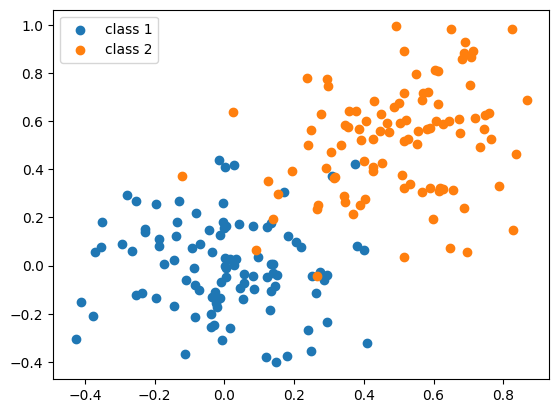

In [ ]:
df = pd.DataFrame()
X1 = np.random.normal(0, 0.2, (100, 2))
X2 = np.random.normal(0.5, 0.2, (100, 2))
df["x"] = np.hstack([X1[:, 0], X2[:, 0]])
df["y"] = np.hstack([X1[:, 1], X2[:, 1]])
df["label"] = np.hstack([np.zeros(100), np.ones(100)])
plt.scatter(df[df["label"] == 0]["x"], df[df["label"] == 0]["y"], label="class 1")
plt.scatter(df[df["label"] == 1]["x"], df[df["label"] == 1]["y"], label="class 2")
plt.legend()
plt.show()

–°–æ–∑–¥–∞–¥–∏–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä,–æ–±—É—á–∏–º –µ–≥–æ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(df[['x', 'y']], df['label'])
print("accuracy:", log_reg.score(df[['x', 'y']], df['label']))

accuracy: 0.96


–ö–∞–∫ –∏ LDA, –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å—Ç—Ä–æ–∏—Ç —Ä—è–∑–¥–µ–ª—è—é—â—É—é –ø—Ä—è–º—É—é, –µ—ë –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∏–∑ –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é –ø–æ–ª–µ–π *.coef_* –∏ *.intercept_*

–¢–µ–ø–µ—Ä—å –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –ø—Ä—è–º—É—é

In [ ]:
#Your code here

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ª–∏–Ω–µ–π–Ω–æ–π, –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –º–æ–∂–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ —Ä–∞–∑–¥–µ–ª—è—é—â–µ–π –ø—Ä—è–º–æ–π, –∑–∞ —ç—Ç–æ –æ—Ç–≤–µ—á–∞–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä *penalty*, –≤–µ–ª–∏—á–∏–Ω—É —à—Ç—Ä–∞—Ñ–∞ —Ä–µ–≥—É–ª–∏—Ä—É–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä *–°*. –ü–æ–¥—Ä–æ–±–Ω–µ–µ –æ–± —ç—Ç–æ–º –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ [–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ L1, L2 –∏ ElasticNet —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ *C*, –∏–∑–æ–±—Ä–∞–∑–∏—Ç–µ –Ω–∞ –æ–¥–Ω–æ–º —Ä–∏—Å—É–Ω–∫–µ –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –≤—Å–µ —á–µ—Ç—ã—Ä–µ —Ä–∞–∑–¥–µ–ª—é—â–∏–µ –ø—Ä—è–º—ã–µ: —Å –∏ –±–µ–∑ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏

In [ ]:
#Your code here

–í –∫–∞–∫–æ–º —Å–ª—É—á–∞–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –Ω–∞–∏–ª—É—á—à–µ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ?

Your answer here

### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, LDA –∏ QDA

–°–º–æ–¥–µ–ª–∏—Ä—É–π—Ç–µ –¥–ª—è –¥–≤—É—Ö –∫–ª–∞—Å—Å–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ 100 –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –≤ $\mathbb{R}^2$: $(X_i, Y_i)$, $X_i ‚àº ùëÖ[‚àí1, 1]$, $Y_i = X_i + Z_i$, –≥–¥–µ $Z_i ‚àº Laplace(-1, 0.5)$ –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏ $Z_i ‚àº Laplace(1, 0.5)$ –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ

In [ ]:
#Your code here

–ó–∞–ø—É—Å—Ç–∏—Ç–µ [–ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) –∏ [QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)

In [ ]:
#Your code here

–ò–∑–æ–±—Ä–∞–∑–∏—Ç–µ —Ç—Ä–∏ [ROC‚Äì–∫—Ä–∏–≤—ã–µ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) –∏ —Ç—Ä–∏ [PR‚Äì–∫—Ä–∏–≤—ã–µ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

In [ ]:
#Your code here

–í—ã–±–µ—Ä–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è ùë° –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —Ç—Ä–µ—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤, –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É—è [ùêπ1‚Äì–º–µ—Ä—É](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [ ]:
#Your code here

–ù–∞—Ä–∏—Å—É–π—Ç–µ –æ–±–ª–∞–∫–∞ —Ç–æ—á–µ–∫ –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏ –∏ —Ç—Ä–∏ —Ä–∞–∑–¥–µ–ª—è—é—â–∏–µ –∫—Ä–∏–≤—ã–µ

In [ ]:
#Your code here

–ö–∞–∫–æ–π –∏–∑ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ —Å–ø—Ä–∞–≤–∏–ª—Å—è –ª—É—á—à–µ –∏ –ø–æ—á–µ–º—É?

Your answer here

## –ó–∞–¥–∞—á–∞ 4

–ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ñ–∞–π–ª–∞ mroz.txt (–æ–ø–∏—Å–∞–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –≤ —Ñ–∞–π–ª–µ mroz.des)

–í–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø–æ –¥–∞–Ω–Ω—ã–º –∂–µ–Ω—â–∏–Ω—ã, —Ä–∞–±–æ—Ç–∞–µ—Ç –ª–∏ –æ–Ω–∞ –∏–ª–∏ –Ω–µ—Ç (–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è inlf, —Ä–∞–≤–Ω–∞—è $1$, –µ—Å–ª–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç).

`–ù–µ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ` –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ hours (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—á–∏—Ö —á–∞—Å–æ–≤ ‚Äî –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Ä–∞–≤–Ω–∞ –Ω—É–ª—é –¥–ª—è –Ω–µ—Ä–∞–±–æ—Ç–∞—é—â–∏—Ö), wage (–∑–∞—Ä–∞–±–æ—Ç–æ–∫ –∂–µ–Ω—â–∏–Ω—ã), repwage (–æ—Ç–≤–µ—Ç –Ω–∞ –≤–æ–ø—Ä–æ—Å –æ –≤–µ–ª–∏—á–∏–Ω–µ –¥–æ—Ö–æ–¥–∞ –∂–µ–Ω—â–∏–Ω—ã) –∏ lwage (–ª–æ–≥–∞—Ä–∏—Ñ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π wage).

–†–∞–∑–±–µ–π—Ç–µ –≤—ã–±–æ—Ä–∫—É –Ω–∞ [train, validation –∏ test sets](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). –†–∞–∑–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã —Å—Ä–∞–≤–Ω–∏–≤–∞–π—Ç–µ –Ω–∞ validation set. –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –≤—ã–±—Ä–∞–Ω–Ω—ã–π –≤–∞–º–∏ –Ω–∞–∏–ª—É—á—à–∏–º, —Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ –Ω–∞ test set.

In [ ]:
#Your code here